Predicting Car Prices from Craigslist Data

Numéro du groupe : 4

Membres du groupe : Clément VURPILLOT, Andréa ZANIN, Antoine URSEL 

In [32]:
pip install kagglehub
#just to install

Note: you may need to restart the kernel to use updated packages.


In [3]:
# -----------------------------
# Import dataset from kaggle
# -----------------------------


import kagglehub

# Download latest version
path = kagglehub.dataset_download("austinreese/craigslist-carstrucks-data")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\cleme\.cache\kagglehub\datasets\austinreese\craigslist-carstrucks-data\versions\10


In [55]:
# -----------------------------
# Import Librari
# -----------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_path = os.path.join(path, file)
        print("CSV file detected:", csv_path)

# Load dataset
df = pd.read_csv(csv_path, low_memory=False)
print("\n Dataset successfully loaded")

CSV file detected: C:\Users\cleme\.cache\kagglehub\datasets\austinreese\craigslist-carstrucks-data\versions\10\vehicles.csv

 Dataset successfully loaded


In [7]:
# -----------------------------
# --- Descriptive Analysis ----
# -----------------------------
print("\n--- Basic Information ---")
print(df.info())

print("\n--- First 5 rows ---")
display(df.head())

print("\n--- Descriptive Statistics ---")
display(df.describe(include='all'))

print("\n--- Missing Values ---")
display(df.isnull().sum().sort_values(ascending=False).head(20))


--- Basic Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN



--- Descriptive Statistics ---


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
count,4.268800e+05,426880,426880,426880,4.268800e+05,425675.000000,409234,421603,252776,249202,...,120519,334022,296677,426812,426810,0.0,426880,420331.000000,420331.000000,426812
unique,NaN,426880,404,413,NaN,NaN,42,29667,6,8,...,4,13,12,241899,360911,NaN,51,NaN,NaN,381536
top,NaN,https://prescott.craigslist.org/cto/d/prescott...,columbus,https://spokane.craigslist.org,NaN,NaN,ford,f-150,good,6 cylinders,...,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,NaN,ca,NaN,NaN,2021-04-23T22:13:05-0400
freq,NaN,1,3608,2988,NaN,NaN,70985,8009,121456,94169,...,63465,87056,79285,7357,231,NaN,50614,NaN,NaN,12
mean,7.311487e+09,NaN,NaN,NaN,7.519903e+04,2011.235191,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.493940,-94.748599,NaN
std,4.473170e+06,NaN,NaN,NaN,1.218228e+07,9.452120,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.841533,18.365462,NaN
min,7.207408e+09,NaN,NaN,NaN,0.000000e+00,1900.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-84.122245,-159.827728,NaN
25%,7.308143e+09,NaN,NaN,NaN,5.900000e+03,2008.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.601900,-111.939847,NaN
50%,7.312621e+09,NaN,NaN,NaN,1.395000e+04,2013.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.150100,-88.432600,NaN
75%,7.315254e+09,NaN,NaN,NaN,2.648575e+04,2017.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.398900,-80.832039,NaN



--- Missing Values ---


county          426880
size            306361
cylinders       177678
condition       174104
VIN             161042
drive           130567
paint_color     130203
type             92858
manufacturer     17646
title_status      8242
lat               6549
long              6549
model             5277
odometer          4400
fuel              3013
transmission      2556
year              1205
description         70
image_url           68
posting_date        68
dtype: int64

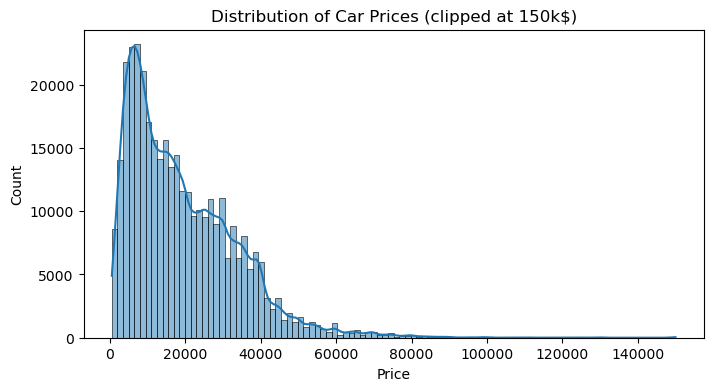

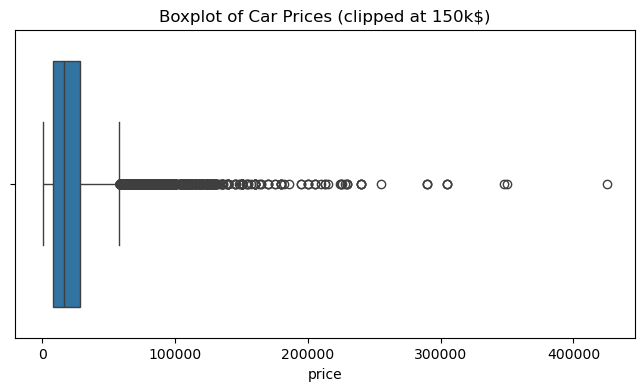

In [39]:
plt.figure(figsize=(8,4))
sns.histplot(df['price'].clip(upper=150000), bins=100, kde=True)
plt.title('Distribution of Car Prices (clipped at 150k$)')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'].clip(upper=500000))
plt.title('Boxplot of Car Prices (clipped at 150k$)')
plt.show()


In [11]:
# -----------------------------
# ------- Preprocessing -------
# -----------------------------

# We remove unrealistic prices (0 or too high)
df = df[(df['price'] > 500) & (df['price'] < 500000)]

# we drop useless columns for our data treatment
columns_to_drop = [
    'id', 'url', 'region_url', 'VIN', 'image_url', 'description', 
    'county', 'lat', 'long'
]
df = df.drop(columns=[c for c in columns_to_drop if c in df.columns])

# we drop the rows wich are missing essential values
essential_cols = ['year', 'manufacturer', 'model', 'odometer', 'fuel', 'transmission']
df = df.dropna(subset=essential_cols)

# I Rremove cars with too many missing features
# (more than 40% )
threshold = 0.4
df = df[df.isnull().mean(axis=1) < threshold]
print(f"\nRemoved cars with > {int(threshold*100)}% missing values. Remaining rows: {len(df)}")

# so in the end we keep only relevant features
selected_cols = [
    'price', 'year', 'manufacturer', 'odometer', 
    'fuel', 'transmission', 'type', 'condition', 'drive', 'cylinders'
]
df = df[selected_cols].copy()

# we fill missing categorical values with "unknown"
for col in ['fuel', 'transmission', 'type', 'condition', 'drive', 'cylinders']:
    df[col] = df[col].fillna('unknown')

# Display of the dataset after cleaning
print("\n--- Dataset after cleaning ---")
display(df.head())

# Encode categorical features
df = pd.get_dummies(df, columns=['manufacturer', 'fuel', 'transmission', 
                                 'type', 'condition', 'drive', 'cylinders'], drop_first=True)



Removed cars with > 40% missing values. Remaining rows: 358493

--- Dataset after cleaning ---


,price,year,manufacturer,odometer,fuel,transmission,type,condition,drive,cylinders
27,33590,2014.0,gmc,57923.0,gas,other,pickup,good,unknown,8 cylinders
28,22590,2010.0,chevrolet,71229.0,gas,other,pickup,good,unknown,8 cylinders
29,39590,2020.0,chevrolet,19160.0,gas,other,pickup,good,unknown,8 cylinders
30,30990,2017.0,toyota,41124.0,gas,other,pickup,good,unknown,8 cylinders
31,15000,2013.0,ford,128000.0,gas,automatic,truck,excellent,rwd,6 cylinders


In [13]:
# -----------------------------
# 5. Formalisation of the problem
# -----------------------------
"""
Goal --> predict a car price based on its features.
So supervised regression problem.
Evaluation metrics used :
- Mean Absolute Error 
- Root Mean Squared Error 
- R^2 Score
"""

X = df.drop(columns=['price'])
y = df['price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


=== Linear Regression ===
MAE:  6722.19
RMSE: 10450.93
R²:   0.488


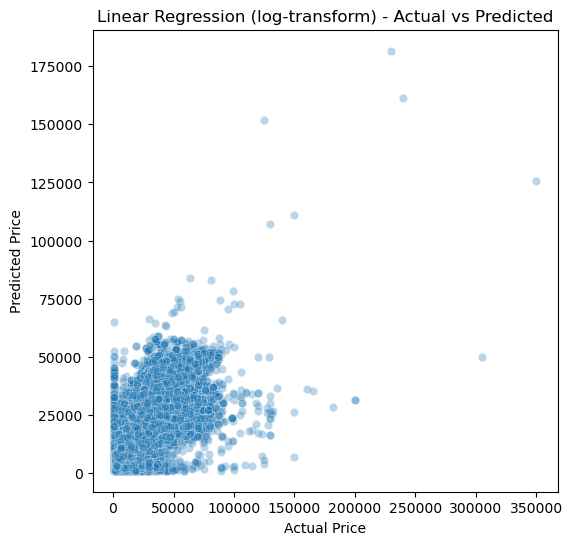

In [19]:
# -----------------------------
# Linear Regression with log
# -----------------------------
print("\n=== Linear Regression ===")

# Log-transform target
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

# Fit model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train_log)

# Predict and transform back
y_pred_log = lr.predict(X_test_scaled)
y_pred_lr = np.exp(y_pred_log)  # return to original scale

# Clip minimal price (optional, safeguard)
y_pred_lr = np.maximum(y_pred_lr, 1000)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"MAE:  {mae_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²:   {r2_lr:.3f}")

# Scatter plot: predicted vs actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression (log-transform) - Actual vs Predicted")
plt.show()




=== Baseline Model 2: Decision Tree Regressor ===
MAE:  4863.77
RMSE: 7781.06
R²:   0.716


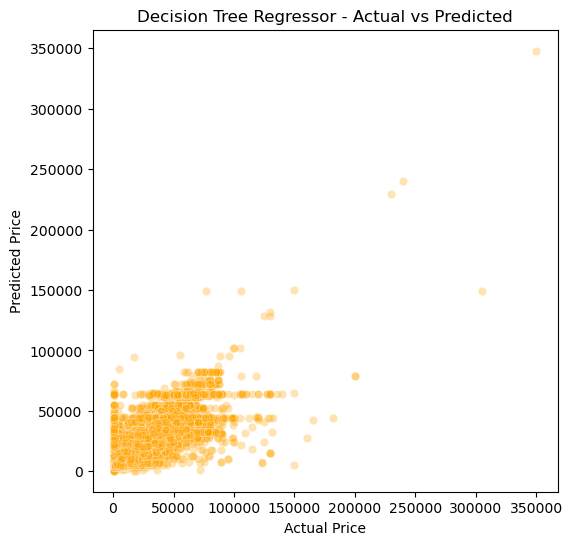

In [17]:
# -----------------------------
# decision Tree Regressor
# -----------------------------
print("\n===Decision Tree Regressor ===")
tree = DecisionTreeRegressor(max_depth=10, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print(f"MAE:  {mae_tree:.2f}")
print(f"RMSE: {rmse_tree:.2f}")
print(f"R²:   {r2_tree:.3f}")

# Scatter plot: predicted vs actual
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_tree, alpha=0.3, color='orange')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regressor - Actual vs Predicted")
plt.show()

In [21]:
# -----------------------------
# Summary of this two model
# -----------------------------
print("\n=== Model Summary ===")
summary = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree (depth=10)"],
    "MAE": [mae_lr, mae_tree],
    "RMSE": [rmse_lr, rmse_tree],
    "R²": [r2_lr, r2_tree]
})
display(summary)


=== Model Summary ===


,Model,MAE,RMSE,R²
0,Linear Regression,6722.185118,10450.931213,0.488217
1,Decision Tree (depth=10),4863.774558,7781.061549,0.716304


=== Random Forest Regressor ===
MAE:  3699.90
RMSE: 6239.19
R²:   0.818


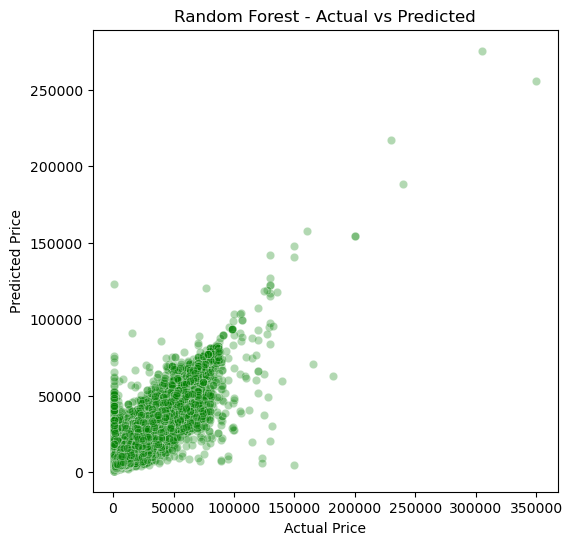


=== CatBoost Regressor ===
0:	learn: 13873.8954021	total: 183ms	remaining: 1m 31s
100:	learn: 7238.3772410	total: 2.3s	remaining: 9.1s
200:	learn: 6774.9315353	total: 4.38s	remaining: 6.52s
300:	learn: 6546.3873530	total: 6.64s	remaining: 4.39s
400:	learn: 6378.4456789	total: 8.95s	remaining: 2.21s
499:	learn: 6247.0433050	total: 11.1s	remaining: 0us
MAE:  3734.78
RMSE: 6262.36
R²:   0.816


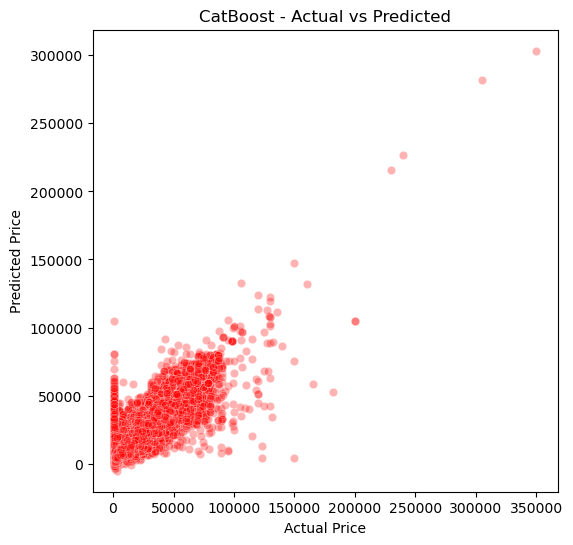

,Model,MAE,RMSE,R²
0,Random Forest,3699.904335,6239.189751,0.817597
1,CatBoost,3734.777405,6262.362223,0.816239


In [27]:
# --------------------------------
# Random Forest + CatBoost (first test of my life)
# ---------------------------------

from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

# -----------------------------
# Random Forest Regressor
# -----------------------------
print("=== Random Forest Regressor ===")

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"MAE:  {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²:   {r2_rf:.3f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.3, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest - Actual vs Predicted")
plt.show()

# -----------------------------
# CatBoost Regressor
# -----------------------------
print("\n=== CatBoost Regressor ===")

# Identification of categorical features 
cat_features = [
    'manufacturer', 'fuel', 'transmission', 'type', 'condition', 'drive', 'cylinders'
]
cat_features_idx = [X.columns.get_loc(c) for c in X.columns if any(c.startswith(cf + "_") for cf in cat_features)]

cb = CatBoostRegressor(
    iterations=500,
    depth=8,
    learning_rate=0.1,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)

cb.fit(X_train, y_train, cat_features=cat_features_idx)

y_pred_cb = cb.predict(X_test)

# Evaluation
mae_cb = mean_absolute_error(y_test, y_pred_cb)
rmse_cb = np.sqrt(mean_squared_error(y_test, y_pred_cb))
r2_cb = r2_score(y_test, y_pred_cb)

print(f"MAE:  {mae_cb:.2f}")
print(f"RMSE: {rmse_cb:.2f}")
print(f"R²:   {r2_cb:.3f}")

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_cb, alpha=0.3, color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("CatBoost - Actual vs Predicted")
plt.show()

# -----------------------------
# Summary
# -----------------------------
summary_adv = pd.DataFrame({
    "Model": ["Random Forest", "CatBoost"],
    "MAE": [mae_rf, mae_cb],
    "RMSE": [rmse_rf, rmse_cb],
    "R²": [r2_rf, r2_cb]
})
display(summary_adv)


In [29]:
# -----------------------------
# Final Comparison
# -----------------------------
summary_final = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "CatBoost"],
    "MAE": [mae_lr, mae_tree, mae_rf, mae_cb],
    "RMSE": [rmse_lr, rmse_tree, rmse_rf, rmse_cb],
    "R²": [r2_lr, r2_tree, r2_rf, r2_cb]
})
display(summary_final)

,Model,MAE,RMSE,R²
0,Linear Regression,6722.185118,10450.931213,0.488217
1,Decision Tree,4863.774558,7781.061549,0.716304
2,Random Forest,3699.904335,6239.189751,0.817597
3,CatBoost,3734.777405,6262.362223,0.816239


Results Interpretation

We evaluated four models to predict car prices from the dataset:

Linear Regression (R2 = 0.49) – Simple model with log-transform, captures only part of the variance and is sensitive to non-linear relationships and outliers.

Decision Tree (R2 = 0.72) – Handles non-linearities and feature interactions, better than linear regression but can overfit if too deep.

Random Forest (R2 = 0.82) – Robust ensemble of trees, best overall performance, effectively captures price variability and handles outliers.

CatBoost (R2 = 0.82) – Optimized for categorical features, performs similarly to Random Forest.

Conclusion: Tree-based models (Random Forest and CatBoost) are best for predicting car prices. Random Forest is robust and easy to use, while CatBoost efficiently handles categorical features.


=== LightGBM Regressor (simple fit) ===
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 286794, number of used features: 76
[LightGBM] [Info] Start training from score 19291.867410
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
MAE: 3649.19, RMSE: 6213.96, R²: 0.819


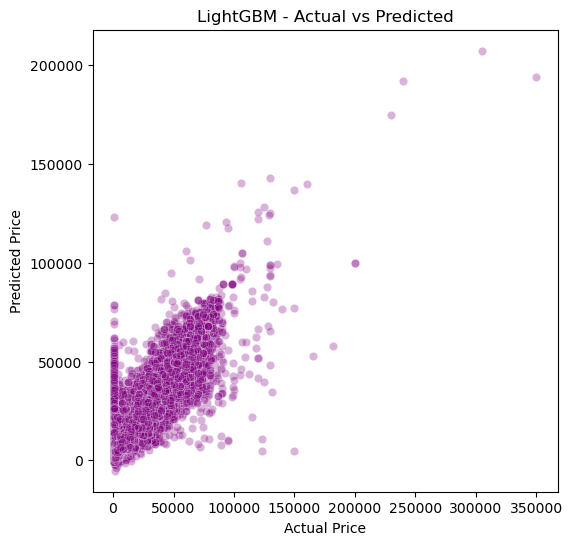

In [53]:
# Bonus : LIGHTGBM REGRESSOR (I'm just testing everything since i have a bit more time, at the end we could just choose the best one for the next step of the project)

from lightgbm import LGBMRegressor

print("\n=== LightGBM Regressor ===")

# Instanciation du modèle
lgbm = LGBMRegressor(
    objective='regression',
    n_estimators=500,
    learning_rate=0.1,
    num_leaves=31,
    max_depth=8,
    random_state=42
)

# traning simple
lgbm.fit(X_train, y_train)

# predict
y_pred_lgb = lgbm.predict(X_test)

# evaluation
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"MAE: {mae_lgb:.2f}, RMSE: {rmse_lgb:.2f}, R²: {r2_lgb:.3f}")

# Graphique Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_lgb, alpha=0.3, color='purple')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("LightGBM - Actual vs Predicted")
plt.show()


In [ ]:
#to execute in case the library are not installed : 
pip install lightgbm
pip install catboost
